In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
import gensim
from matplotlib import pyplot as plt

%matplotlib inline

/home/cuiyanfei/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# 使用sklearn

In [2]:
class _filename():
    def __init__(self):
        self.expr = "Brain-expr_matrix.txt"
        self.expr_small = "Brain-expr_matrix-smallData.txt"
        self.spot = "Brain-spot_position.txt"
        self.spot_small = "Brain-spot_position-smallData.txt"
        
filename = _filename()

In [3]:
expr_df = pd.read_csv(filename.expr, sep="\t")
expr_small_df = pd.read_csv(filename.expr_small, sep="\t")
spot_df = pd.read_csv(filename.spot, sep="\t")
spot_small_df = pd.read_csv(filename.spot_small, sep="\t")

In [4]:
lda1 = LDA(n_components = 6, random_state = 520, learning_decay = 0.7, n_jobs = -1)
lda2 = LDA(n_components = 6, random_state = 520, learning_decay = 0.5, n_jobs = -1)
lda3 = LDA(n_components = 4, random_state = 520, learning_decay = 0.7, n_jobs = -1)

In [5]:
def show_clusters(lda, expr_df, spot_df):
    pred_df = expr_df.copy()
    pred_df = pred_df.drop(pred_df.index[1:])
    pred_df.index = ["cluster"]
    clusters = lda.fit_transform(expr_df.T)
    clusters = np.argmax(clusters, axis=1)
    pred_df.iloc[0] = clusters
    print("approximate log-likelihood = %f"%(lda.score(expr_df.T)))
    
    plt.figure(figsize=(10,10))
    colors = ["red", "green", "blue", "orange", "purple", "black"]
    classes = np.unique(pred_df)
    for i, cluster in enumerate(classes):
        idxs = np.where(pred_df == cluster)[1]
        plt.plot(spot_df.iloc[idxs, 1], spot_df.iloc[idxs, 2], ".", color = colors[i], label = "%d"%(i))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Visualization of Clustering")
    plt.legend()
    plt.show()
    
    return pred_df

approximate log-likelihood = -26755815.731440


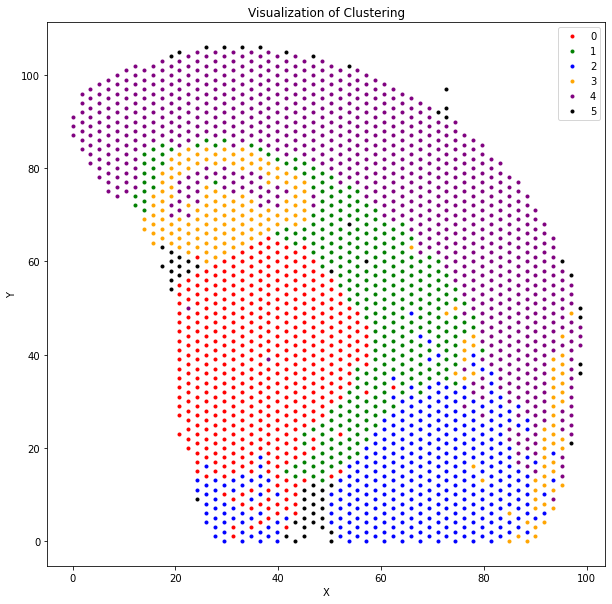

,TCGGCTAACTTCCCTT-1,ATATCGTGCCAGACCC-1,ACGCTTAGTGTCTCTC-1,TAGTGGAACTCATACA-1,GTTATTAAATACGACC-1,AACTGGGTTCGAGCCG-1,CATGCACGTGTTACTG-1,CATTCACTGACAGCTA-1,CATGAACCTCTTATCA-1,TTAATGCGAGGTAACT-1,...,AAGATGGCACCGGACC-1,CTACAAGAAATAACCC-1,ACTATTTCCGGGCCCA-1,TTGTTTCACATCCAGG-1,CGCTGTGTGGATGTTG-1,TCAACATAGCGCCCTA-1,TACTCTTTCGTCTTCA-1,GAATAGTGCTCGATTA-1,CACATCGTGCACGCGC-1,CCCAATGAGATTTGCA-1
cluster,5,5,4,4,4,5,5,5,4,5,...,4,4,4,4,4,4,4,4,4,4


In [6]:
show_clusters(lda1, expr_df, spot_df)

approximate log-likelihood = -26755815.731440


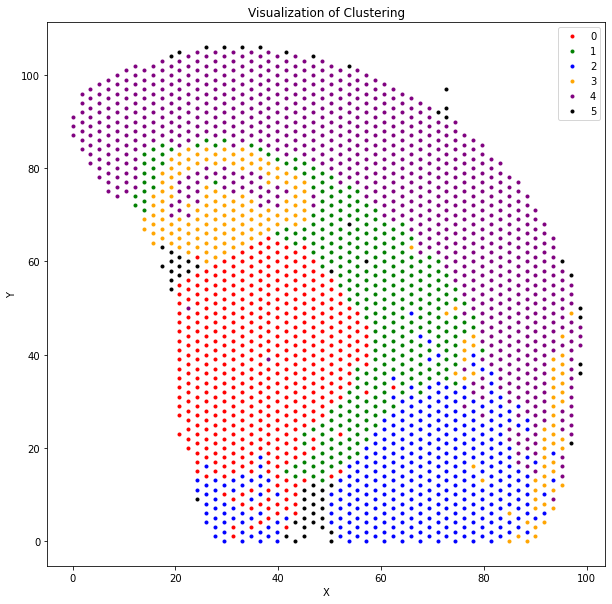

,TCGGCTAACTTCCCTT-1,ATATCGTGCCAGACCC-1,ACGCTTAGTGTCTCTC-1,TAGTGGAACTCATACA-1,GTTATTAAATACGACC-1,AACTGGGTTCGAGCCG-1,CATGCACGTGTTACTG-1,CATTCACTGACAGCTA-1,CATGAACCTCTTATCA-1,TTAATGCGAGGTAACT-1,...,AAGATGGCACCGGACC-1,CTACAAGAAATAACCC-1,ACTATTTCCGGGCCCA-1,TTGTTTCACATCCAGG-1,CGCTGTGTGGATGTTG-1,TCAACATAGCGCCCTA-1,TACTCTTTCGTCTTCA-1,GAATAGTGCTCGATTA-1,CACATCGTGCACGCGC-1,CCCAATGAGATTTGCA-1
cluster,5,5,4,4,4,5,5,5,4,5,...,4,4,4,4,4,4,4,4,4,4


In [7]:
show_clusters(lda2, expr_df, spot_df)

approximate log-likelihood = -26770524.131989


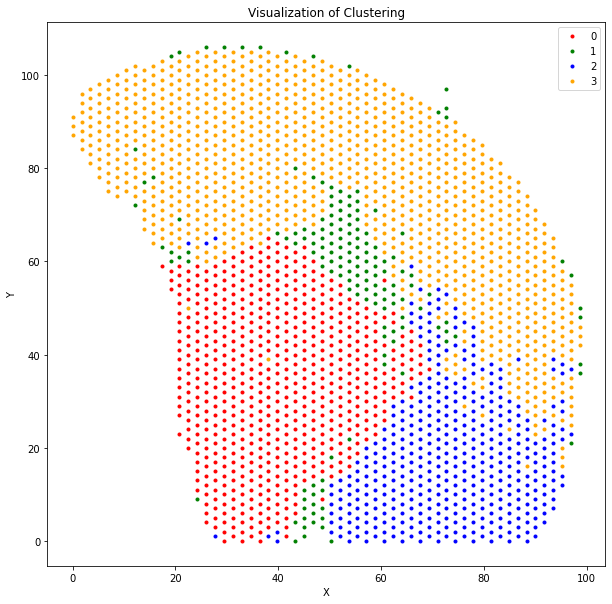

,TCGGCTAACTTCCCTT-1,ATATCGTGCCAGACCC-1,ACGCTTAGTGTCTCTC-1,TAGTGGAACTCATACA-1,GTTATTAAATACGACC-1,AACTGGGTTCGAGCCG-1,CATGCACGTGTTACTG-1,CATTCACTGACAGCTA-1,CATGAACCTCTTATCA-1,TTAATGCGAGGTAACT-1,...,AAGATGGCACCGGACC-1,CTACAAGAAATAACCC-1,ACTATTTCCGGGCCCA-1,TTGTTTCACATCCAGG-1,CGCTGTGTGGATGTTG-1,TCAACATAGCGCCCTA-1,TACTCTTTCGTCTTCA-1,GAATAGTGCTCGATTA-1,CACATCGTGCACGCGC-1,CCCAATGAGATTTGCA-1
cluster,1,1,3,3,3,1,1,1,3,1,...,3,3,3,3,3,3,3,3,3,3


In [8]:
show_clusters(lda3, expr_df, spot_df)

# 使用PyMC3

In [16]:
import pymc3 as pm

In [17]:
exprData = pd.read_csv('Brain-expr_matrix-smallData.txt', index_col = 0, sep = '\t')
genes = exprData.index.tolist()

In [46]:
gene_idx = dict(zip(genes, range(len(genes))))
exprDoc_idx = [[i for i in range(exprData.shape[0]) for k in range(exprData.iloc[i,j])] for j in range(exprData.shape[1])]

In [81]:
## ----- 3.initialize the hyper-parameters -----
batch_size = exprData.shape[1]
n_clusters = 2
n_gene = len(genes)
length_docs = [len(doc) for doc in exprDoc_idx]
alpha = np.ones((batch_size, n_clusters))
beta = np.ones((n_clusters, n_gene))


## ----- 4.construct the LDA model and perform reference and learning
with pm.Model() as model:
    
    thetas = pm.distributions.Dirichlet('thetas', a=alpha, shape=(batch_size, n_clusters))    # Spot-cluster (document-topic) distribution (Dirichlet)
    betas = pm.distributions.Dirichlet('betas', a=beta, shape=(n_clusters, n_gene))     # Cluster-gene (topic-word) distribution (Dirichlet)
    zs = [pm.Categorical("z_d{}".format(d), p=thetas[d], shape=length_docs[d]) for d in range(batch_size)]         # Gene-cluster (word-topic) assignment (Categorical)
    ws = [pm.Categorical("w_{}_{}".format(d,i), p=betas[zs[d][i]], observed=exprDoc_idx[d][i]) for d in range(batch_size) for i in range(length_docs[d])]         # Observed gene (word) (Categorical)
    
    trace = pm.sample(2000)
    # inference and learning
    #

<ipython-input-81-6f465efc4d8a>:18: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [betas, thetas]
>BinaryGibbsMetropolis: [z_d0, z_d1, z_d2, z_d3, z_d4, z_d5, z_d6, z_d7, z_d8, z_d9, z_d10, z_d11, z_d12, z_d13, z_d14, z_d15, z_d16, z_d17, z_d18, z_d19]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 986 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [82]:
trace["thetas"].sum(axis=0).argmax(axis=1)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [83]:
preds = exprData.copy()
preds = preds.drop(preds.index[1:])
preds.index = ["clusters"]
preds.iloc[0] = trace["thetas"].sum(axis=0).argmax(axis=1)
preds

,AACGTCAGACTAGTGG-1,AAGGCGCGTAAAGCTT-1,AATGACTGTCAGCCGG-1,ACACCTTAAGTAGGGC-1,ACTACCAGCTCTCTGG-1,AGTCGGCCCAAACGAC-1,ATCTTGACCTGCAACG-1,ATTCCTCCGCCAGTGC-1,CAGATACTAACATAGT-1,CGCTGTGACGCCGCAC-1,GAATCGACATGGTCAC-1,GCAAGTGCACAGAGAA-1,GCTCTATGTTACGTGC-1,GGAGAAGTCATTGGCA-1,TATTTGTTACCCTTTA-1,TCACGGTCATCGCACA-1,TCTAGCATCTTCGATG-1,TGGCCGTATATTGACC-1,TTCGACGGGAAGGGCG-1,TTCGCACTCGCGTGCT-1
clusters,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0


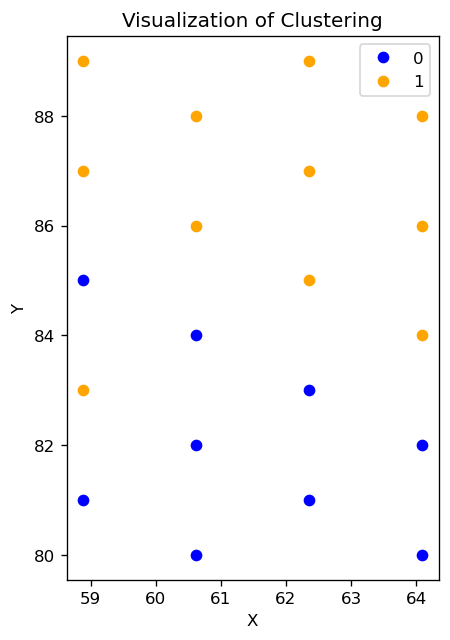

In [84]:
spotPosition = pd.read_csv('Brain-spot_position-smallData.txt', sep = '\t')
plt.figure(figsize=(4,6), dpi=120)
colors = ["blue", "orange"]
classes = np.unique(preds)
for i, cluster in enumerate(classes):
    idxs = np.where(preds == cluster)[1]
    plt.plot(spotPosition.iloc[idxs, 1], spotPosition.iloc[idxs, 2], "o", color = colors[i], label = "%d"%(i))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualization of Clustering")
plt.legend()
plt.show()